<a href="https://colab.research.google.com/github/vk-98/credicxo/blob/master/Credicxo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chemical Classifier in classes of Muke or Non-Muke**


In [0]:
#for mathematical operations
import numpy as np
#for manupulating data
import pandas as pd
#for visualisation
import matplotlib.pyplot as plt
#for shuffling 
import random
#for splitting data in test and train data
from sklearn.model_selection import train_test_split
#for scaling data
from sklearn.preprocessing import StandardScaler
#for using multi-layer perceptron classifier of sklearn
from sklearn.neural_network import MLPClassifier
#for generating confusion matrix and classfication report
from sklearn.metrics import confusion_matrix, classification_report
#Sequential model to make neural network
from keras.models import Sequential
#for adding layers and activation functions
from keras.layers import Dense, Activation

# **Importing Data**

In [60]:
#clonning dataset from github repo
!git clone https://github.com/vk-98/credicxo

fatal: destination path 'credicxo' already exists and is not an empty directory.


In [0]:
#loading data from csv file using panadas.read_csv funtion
chemical_data = pd.read_csv('credicxo/musk_csv.csv')

In [62]:
#looking at the information about data
print(chemical_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB
None


**Observation**
There is no null values present in the dataset


In [63]:
#Details about the Data
print("Total No of Columns/features in the data : ", len(chemical_data.columns))
print("Total No of Data Points : ", len(chemical_data))
print("Total No of Different Classes : ", len(chemical_data['class'].unique()))
print("*"*100)
print("Feature Names : ")
print(chemical_data.columns)

Total No of Columns/features in the data :  170
Total No of Data Points :  6598
Total No of Different Classes :  2
****************************************************************************************************
Feature Names : 
Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)


# Data Preparation

In [64]:
#watching top 10 datapoints of chemical data
print(chemical_data.head(10))

   ID molecule_name conformation_name  f1   f2  ...  f163  f164  f165  f166  class
0   1      MUSK-211           211_1+1  46 -108  ...   156   -50  -112    96      1
1   2      MUSK-211          211_1+10  41 -188  ...   169   -61  -136    79      1
2   3      MUSK-211          211_1+11  46 -194  ...   165   -67  -145    39      1
3   4      MUSK-211          211_1+12  41 -188  ...   168   -60  -135    80      1
4   5      MUSK-211          211_1+13  41 -188  ...   168   -60  -135    80      1
5   6      MUSK-211          211_1+14  46 -194  ...   164   -67  -145    40      1
6   7      MUSK-211          211_1+15  47 -199  ...   165   -68  -145    37      1
7   8      MUSK-211          211_1+16  41 -199  ...   169   -60  -135    81      1
8   9      MUSK-211          211_1+17  41 -199  ...   169   -60  -135    81      1
9  10      MUSK-211          211_1+18  47 -199  ...   165   -68  -146    37      1

[10 rows x 170 columns]


**Here there are two features (molecule_name and conformation_name) who needs to be converted into integer values**

In [65]:
#watching how many different values these two feature have
print("Different values of molecule_name in the data :", len(chemical_data['molecule_name'].unique()))
print("Different values of conformation_name in the data :", len(chemical_data['conformation_name'].unique()))

Different values of molecule_name in the data : 102
Different values of conformation_name in the data : 6598


**Observation:**



Molecule names are less in comparision to total data points. Hence we can replace them with integer values.

Conformation values are equal to total data points. Hence its better to drop this feature.

In [0]:
#dropping conformation_name feature
chemical_data.drop(['conformation_name'], axis = 1, inplace = True)

In [0]:
#function to map string to an integer
def map_name_to_integer(data):
    labels = data.unique()
    labels = list(enumerate(labels))
    mapping_dict = {}
    for label in labels:
        mapping_dict[label[1]] = int(label[0])
    data = [ mapping_dict[data_point] for data_point in data ]
    return data

In [0]:
#mapping molecule names to integer
chemical_data['molecule_name'] = map_name_to_integer(chemical_data['molecule_name'])

In [0]:
#converting chemical data into numpy array
chemical_data = np.array(chemical_data)

In [0]:
#shuffling dataset
random.shuffle(chemical_data)

In [0]:
#separating input data and class/target
input_data = chemical_data[:,:-1]
target_value = chemical_data[:,-1]

In [0]:
#splitting data into training and testing data set with ration (4:1)
X_train, X_test, Y_train, Y_test = train_test_split (input_data, target_value, random_state = 1, test_size = 0.2)

In [0]:
#scaling the data to reduce the variance in feature values
scaler = StandardScaler()
#fiting scaler values according to X_train and transforming training data
X_train = scaler.fit_transform(X_train)
#transfroming X_test by the same Scaler
X_test = scaler.transform(X_test)

# Model Creation

**MLP model**

In [0]:
# Multi level perceptron model using sklearn
classifier = MLPClassifier()


In [75]:
#fitting data into classifier
classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
#getting predictions from classifier
MLPClassifier_predictions = classifier.predict(X_test)

**Artificial Neural Network Model using Keras**

In [0]:
#creating model
model = Sequential([
                    Dense(32, input_shape = (168,)),
                    Activation('relu'),
                    Dense(1),
                    Activation('sigmoid')
])
#Here I have use 2 layers
#First layer have 32 units of perceptrons and using relu as activation funtion
#second layer have only single unit of perceptron due to binary classification required only, and sigmoid function is used as activation funtion

In [0]:
#compiling model and specifying optimizer, loss functions and metrics to be displaced while training model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [79]:
#fitting data and collecting data of accuracy and loss value after every epoch
#epoch used = 10
history = model.fit(
    X_train, Y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = [X_test, Y_test]
)

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 0s 90us/step - loss: 0.2786 - acc: 0.8979 - val_loss: 0.1137 - val_acc: 0.9833
Epoch 2/10
5278/5278 [==============================] - 0s 50us/step - loss: 0.0725 - acc: 0.9919 - val_loss: 0.0464 - val_acc: 0.9955
Epoch 3/10
5278/5278 [==============================] - 0s 48us/step - loss: 0.0300 - acc: 0.9989 - val_loss: 0.0217 - val_acc: 0.9992
Epoch 4/10
5278/5278 [==============================] - 0s 48us/step - loss: 0.0149 - acc: 0.9996 - val_loss: 0.0122 - val_acc: 0.9992
Epoch 5/10
5278/5278 [==============================] - 0s 48us/step - loss: 0.0087 - acc: 0.9998 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 6/10
5278/5278 [==============================] - 0s 47us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 7/10
5278/5278 [==============================] - 0s 48us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 8

In [0]:
#getting predictions from model
ANN_predictions = model.predict_classes(X_test)

# Result and Performance analysis of models

**MLP Classifier**

In [83]:
#printing confusion matrix for MLP classifier on testing data
print(confusion_matrix(Y_test, MLPClassifier_predictions))

[[761   0]
 [  0 559]]


In [93]:
#printing classification report for MLP Classifier on testing data
print(classification_report(Y_test, MLPClassifier_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       761
           1       1.00      1.00      1.00       559

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



**Artifical Neural Network Model using Keras**

In [94]:
#printing confusion matrix from ANN model for testing data
print(confusion_matrix(Y_test, ANN_predictions))

[[761   0]
 [  0 559]]


In [96]:
#printing classification report for ANN model for testing data
print(classification_report(Y_test, ANN_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       761
           1       1.00      1.00      1.00       559

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



**Making Graphs of loss and accuracy of models with each epoch**

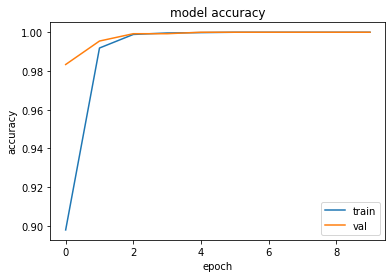

In [97]:
#graph for Accuracy of model with each epoch of training and testing data
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

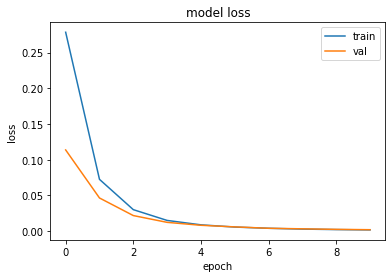

In [98]:
#graph for Accuracy of model with each epoch of training and testing data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

**Both the models working superbly well in predicting class of for all test and training data**